In [119]:
setwd('C:/Users/qlian/OneDrive/Desktop/Grad Fall 2020 Courses/EAS 506 Statistical Mining I/WEEK4')

# Question 1

### Import Libraries

In [120]:
library(leaps)
library(Metrics)

### Load the dataset

In [121]:
cereal_df = read.csv("cereal.csv",header=T,na.string="?")

In [122]:
head(cereal_df)

name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1,0.33,68.40297
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1,1.00,33.98368
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1,0.33,59.42551
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1,0.50,93.70491
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1,0.75,34.38484
Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.50954


In [123]:
dim(cereal_df)

[1] 77 16

In [124]:
str(cereal_df)

'data.frame':	77 obs. of  16 variables:
 $ name    : Factor w/ 77 levels "100% Bran","100% Natural Bran",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ mfr     : Factor w/ 7 levels "A","G","K","N",..: 4 6 3 3 7 2 3 2 7 5 ...
 $ type    : Factor w/ 2 levels "C","H": 1 1 1 1 1 1 1 1 1 1 ...
 $ calories: int  70 120 70 50 110 110 110 130 90 90 ...
 $ protein : int  4 3 4 4 2 2 2 3 2 3 ...
 $ fat     : int  1 5 1 0 2 2 0 2 1 0 ...
 $ sodium  : int  130 15 260 140 200 180 125 210 200 210 ...
 $ fiber   : num  10 2 9 14 1 1.5 1 2 4 5 ...
 $ carbo   : num  5 8 7 8 14 10.5 11 18 15 13 ...
 $ sugars  : int  6 8 5 0 8 10 14 8 6 5 ...
 $ potass  : int  280 135 320 330 -1 70 30 100 125 190 ...
 $ vitamins: int  25 0 25 25 25 25 25 25 25 25 ...
 $ shelf   : int  3 3 3 3 3 1 2 3 1 3 ...
 $ weight  : num  1 1 1 1 1 1 1 1.33 1 1 ...
 $ cups    : num  0.33 1 0.33 0.5 0.75 0.75 1 0.75 0.67 0.67 ...
 $ rating  : num  68.4 34 59.4 93.7 34.4 ...


- we have three factor variables, "name", "mfr" and "type". Notice that "name" variable have 77 levels and we have 77 obervations.Indicating that each row has a unique name. We can go ahead and drop this variable, since it will not provide us with any useful information.
- we can go ahead and convert, "mfr" and "type" to numeric variables

#### Dropping variable "name"

In [125]:
cereal_df <- cereal_df[,-c(1)]

#### Covert Factor data to Numerical data

In [126]:
cereal_df$mfr <- as.numeric(cereal_df$mfr)

In [127]:
cereal_df$type <- as.numeric(cereal_df$type)

#### Check for missing values

In [128]:
colSums(is.na(cereal_df))

mfr     type calories  protein      fat   sodium    fiber    carbo 
       0        0        0        0        0        0        0        0 
  sugars   potass vitamins    shelf   weight     cups   rating 
       0        0        0        0        0        0        0

- No missing values, let's proceed!

In [129]:
attach(cereal_df)

The following objects are masked from cereal_df (pos = 3):

    calories, carbo, cups, fat, fiber, mfr, potass, protein, rating,
    shelf, sodium, sugars, type, vitamins, weight



## Part (a)

### Train test split 
- We will perform 70/30 train test split. We will also randomize the data before splitting it. 


In [130]:
set.seed(50)

In [131]:
indi = sample(1:length(cereal_df[,1]), 2/3*length(cereal_df[,1]))
cereal_train_df = cereal_df[indi,]
cereal_test_df = cereal_df[-indi,]


### Defining independent and depednent variables

In [132]:
y_idx = grep("rating", colnames(cereal_train_df))
y_train_cereal = cereal_train_df[,y_idx]
X_train_cereal = cereal_train_df[,-y_idx]
y_test_cereal = cereal_test_df[,y_idx]
X_test_cereal = cereal_test_df[,-y_idx]

### Least Square Method
- we will fit a liear model using lm() function without performing any feature selection technique. We will use this model as our baseline model to compare with other models

In [133]:
lm_mod_cereal <- lm(formula = rating ~.,data = cereal_train_df)

#### Calculate MSE

In [390]:
MSE_cereal = mse(y_test_cereal,y_pred_cereal)
cat("MSE for least-square method model: ", MSE_cereal)

MSE for least-square method model:  2.972988e-13

## Part (b) Forward Subset Selection
- we will perform forward subset selection to generate a new model
- we will explore two methods to choose the best combination of variables for this method
    - in-sample method by looking at rss, adjusted R-square, Cp, and BIC
    - validation set method, by using a test data set 

### Forward  subset selection In sample Method

In [173]:
regfit_fwd <- regsubsets(rating~., data=cereal_df, nbest = 1, nvmax= 14, method="forward")

In [174]:
regfit_fwd_sum <- summary(regfit_fwd)

In [175]:
regfit_fwd_sum$outmat

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
1 ( 1 ),,,,,,,,,*,,,,,
2 ( 1 ),,,,,,,*,,*,,,,,
3 ( 1 ),,,,,,*,*,,*,,,,,
4 ( 1 ),,,,,*,*,*,,*,,,,,
5 ( 1 ),,,,*,*,*,*,,*,,,,,
6 ( 1 ),,,,*,*,*,*,*,*,,,,,
7 ( 1 ),,,*,*,*,*,*,*,*,,,,,
8 ( 1 ),,,*,*,*,*,*,*,*,,*,,,
9 ( 1 ),,,*,*,*,*,*,*,*,*,*,,,
10 ( 1 ),,,*,*,*,*,*,*,*,*,*,,,*


- we can see that "sugars" have been included in every variable

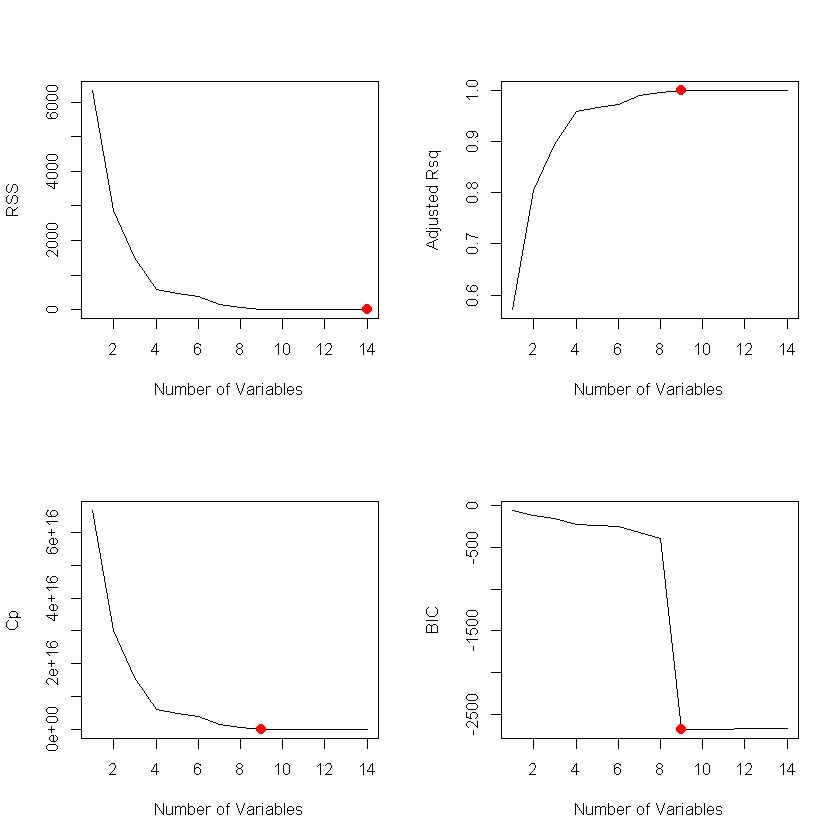

In [176]:
par(mfrow=c(2,2))

plot(regfit_fwd_sum$rss,xlab = "Number of Variables", ylab = "RSS", type = "l")
min_rss <- which.min(regfit_fwd_sum$rss)
points(min_rss,regfit_fwd_sum$rss[min_rss],col="red",cex=2,pch=20)

plot(regfit_fwd_sum$adjr2,xlab = "Number of Variables", ylab = "Adjusted Rsq", type = "l")
max_adjrsq <- which.max(regfit_fwd_sum$adjr2)
points(max_adjrsq,regfit_fwd_sum$adjr2[max_adjrsq],col="red",cex=2,pch=20)

plot(regfit_fwd_sum$cp,xlab = "Number of Variables", ylab = "Cp", type = "l")
min_cp <- which.min(regfit_fwd_sum$cp)
points(min_cp,regfit_fwd_sum$cp[min_cp],col="red",cex=2,pch=20)

plot(regfit_fwd_sum$bic,xlab = "Number of Variables", ylab = "BIC", type = "l")
min_bic <- which.min(regfit_fwd_sum$bic)
points(min_bic,regfit_fwd_sum$bic[min_bic],col="red",cex=2,pch=20)

In [177]:
cbind(min_rss,max_adj,min_cp,min_bic)

min_rss,max_adj,min_cp,min_bic
14,9,9,9


- By looking at rss, adjusted R-squared, Cp and BIC, we can see that adjusted R-squared is largest, Cp and BIC are lowest with the 9-variable model. Rss is smallest with 14-variable model, although you can see 9-variable model performs similarly accordin to the graph above. Notice this is a big decrease in BIC going from 8 to 9 variables. 
- We will generate a 9-variable model using the in-sample method. cbind(min_rss,max_adj,min_cp,min_bic)

In [409]:
coef_fwd_insample = coef(regfit_fwd,9)


In [393]:
mat_cereal = model.matrix(cereal_df$rating~.,data=cereal_df)

In [395]:
y_pred_cereal_fwd = mat_cereal[,names(coef_fwd_insample)] %*% coef_fwd_insample

#### Calculate MSE

In [402]:
MSE_fwd_insample = mse(cereal_df$rating,y_pred_cereal_fwd)
cat("MSE for forward subset selection using the in-sample method is:", MSE_fwd_insample)

MSE for forward subset selection using the in-sample method is: 7.970696e-14

### Model selection for forward method using the validation set approach 

In [179]:
regfit_fwd_train <- regsubsets(cereal_train_df$rating~., data=cereal_train_df, nbest = 1, nvmax= 14, method="forward")

In [181]:
test_mat_cereal = model.matrix(cereal_test_df$rating~.,data=cereal_test_df)

In [182]:
cv_err_cereal_fwd <- rep(NA,14) 
for (i in 1:14){
    coefi = coef(regfit_fwd_train,id=i)
    pred = test_mat_cereal[,names(coefi)] %*% coefi
    cv_err_cereal_fwd[i] = mse(y_test_cereal,pred)
}

In [534]:
which.min(cv_err_cereal_fwd)

[1] 10

- Model with 10 variables yielded the lowest cross validation error, this will be our final model for forward subset selection using the validation set method

#### Calculate MSE

In [525]:
MSE_fwd_valset = min(cv_err_cereal_fwd)
cat("MSE for forward subset selection using the validation set method is:", MSE_fwd_valset)

MSE for forward subset selection using the validation set method is: 2.344651e-13

In [407]:
coef_fwd_valset = coef(regfit_fwd_train,10)

In [417]:
coef(regfit_fwd_train,9)


(Intercept)     protein         fat      sodium       fiber       carbo 
53.29178436  2.79094179 -3.64590156 -0.05327446  3.29380149  0.11950952 
     sugars      potass    vitamins        cups 
-1.60217891 -0.03294498 -0.05237625  1.84828306

### Comparing the two methods for subset section: in-sample and validation set approach

In [406]:
cbind(MSE_fwd_insample,MSE_fwd_valset)

MSE_fwd_insample,MSE_fwd_valset
7.970696e-14,2.344651e-13


In [416]:
print("cofficients included in the final model using the in-sample method, and it has a total of 9 variables: ")
coef_fwd_insample

print("cofficients included in the final model using the in-validation set method, and it has a total of 10 variables: ")
coef_fwd_valset

[1] "cofficients included in the final model using the in-sample method, and it has a total of 9 variables: "


(Intercept)    calories     protein         fat      sodium       fiber 
54.92718420 -0.22272417  3.27317387 -1.69140800 -0.05449270  3.44347977 
      carbo      sugars      potass    vitamins 
 1.09245094 -0.72489514 -0.03399335 -0.05121197

[1] "cofficients included in the final model using the in-validation set method, and it has a total of 10 variables: "


(Intercept)      calories       protein           fat        sodium 
 5.492718e+01 -2.227242e-01  3.273174e+00 -1.691408e+00 -5.449270e-02 
        fiber         carbo        sugars        potass      vitamins 
 3.443480e+00  1.092451e+00 -7.248951e-01 -3.399335e-02 -5.121197e-02 
         cups 
 5.158980e-08

- we can see that the best model using the validation set approach included 10 variables, 1 more than the in-sample method. The validation set model had an additional variable - "cups", but everything else is the same.
- we can see that the MSE for the validation set is higher than the MSE for the in-sample method, in this case. This could be due to that the in-sample method is performed using whole dataset. However, this method could be subject to error, since the number of variables that will be included in the final model is up to the person who is performing the subset selection. (although here, we took the min, since BIC had a substantial decrease from 8-variable model to 9-variable model." Even though the MSE calculated using the validation set approach, is higher, however, the it is in general a pretty small MSE with a value of ~2.344e-13.

## Part (c) Best Subset/ Exhaustive Subset Selection
- we will do perform the same methods in part(b) for exhaustive subset selection, using both the in-sample and validation set approach

### Exhaustive subset selection

In [185]:
regfit_exh <- regsubsets(rating~., data=cereal_df, nbest = 1, nvmax=14, method='exhaustive')

In [186]:
regfit_exh_sum <- summary(regfit_exh)

In [187]:
regfit_exh_sum$outmat

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
1 ( 1 ),,,,,,,,,*,,,,,
2 ( 1 ),,,,,,,*,,*,,,,,
3 ( 1 ),,,,,,*,*,,*,,,,,
4 ( 1 ),,,,,*,*,*,,*,,,,,
5 ( 1 ),,,*,*,,*,*,*,,,,,,
6 ( 1 ),,,*,*,,*,*,*,*,,,,,
7 ( 1 ),,,*,*,*,*,*,*,*,,,,,
8 ( 1 ),,,*,*,*,*,*,*,*,,*,,,
9 ( 1 ),,,*,*,*,*,*,*,*,*,*,,,
10 ( 1 ),,,*,*,*,*,*,*,*,*,*,,,*


- we can see that "sugar" was included in also every model, but in 5-variable, "sugars" is not considered, since this is a greedy subset selection method

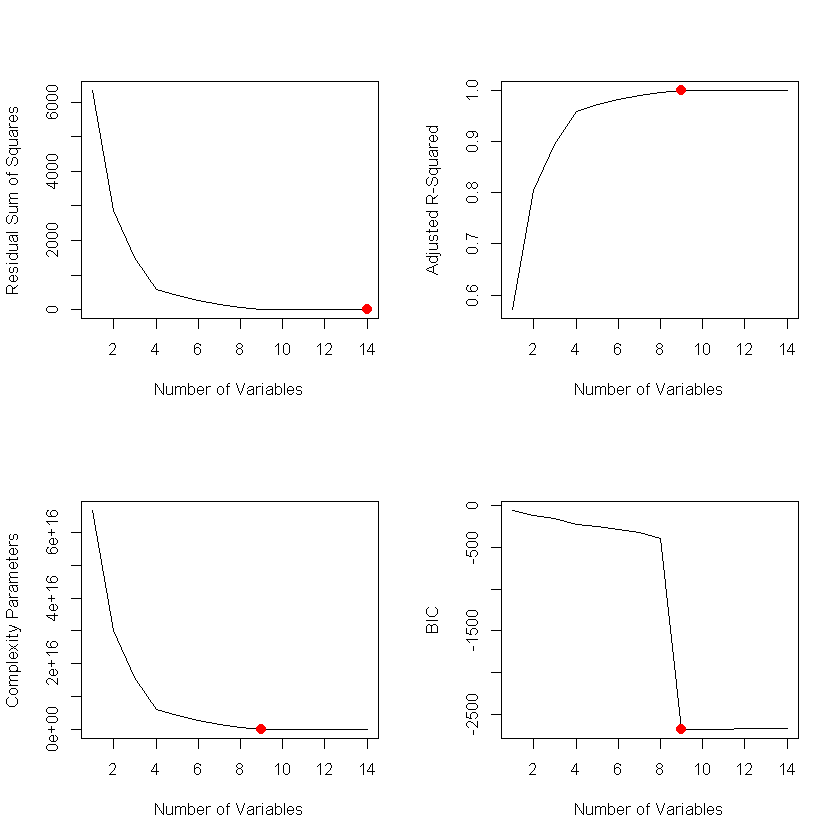

In [188]:
par(mfrow=c(2,2))
plot(regfit_exh_sum$rss,xlab = "Number of Variables", ylab = "Residual Sum of Squares",type="l")
min_rss = which.min(regfit_exh_sum$rss)
points(min_rss,regfit_exh_sum$rss[min_rss],col="red",cex=2,pch=20)

plot(regfit_exh_sum$adjr2,xlab = "Number of Variables", ylab = "Adjusted R-Squared",type="l")
max_adj = which.max(regfit_exh_sum$adjr2)
points(max_adj,regfit_exh_sum$adjr2[max_adj],col="red",cex=2,pch=20)

plot(regfit_exh_sum$cp,xlab = "Number of Variables", ylab = "Complexity Parameters",type="l")
min_cp = which.min(regfit_exh_sum$cp)
points(min_cp,regfit_exh_sum$cp[min_cp],col="red",cex=2,pch=20)

plot(regfit_exh_sum$bic,xlab = "Number of Variables", ylab = "BIC",type="l")
min_bic = which.min(regfit_exh_sum$bic)
points(min_bic,regfit_exh_sum$bic[min_bic],col="red",cex=2,pch=20)


In [189]:
cbind(min_rss,max_adj,min_cp,min_bic)

min_rss,max_adj,min_cp,min_bic
14,9,9,9


- By looking at rss, adjusted R-squared, Cp and BIC, we can see that adjusted R-squared is largest, Cp and BIC are lowest with the 9-variable model. Rss is smallest with 14-variable model, although you can see 9-variable model performs similarly accordin to the graph above. Notice this is a big decrease in BIC going from 8 to 9 variables. 
- We will generate a 9-variable model using the in-sample method. cbind(min_rss,max_adj,min_cp,min_bic)
- note that this is very similar (even identical to the forward subset selection in sample appraoch)


In [418]:
coef_exh_insample = coef(regfit_exh,9)

In [421]:
y_pred_cereal_exh = mat_cereal[,names(coef_exh_insample)] %*% coef_fwd_insample

#### Calculate MSE

In [420]:
MSE_exh_insample = mse(cereal_df$rating,y_pred_cereal_exh)
cat("MSE for best subset selection using the in-sample method is:", MSE_exh_insample)

MSE for best subset selection using the in-sample method is: 7.970696e-14

- note that the MSE is identical as the forward selection method using the insample technique. This indicates that these two methods outputted two identical models

### Model selection for exhaustive method using the validation set approach 

In [191]:
regfit_exh_train <- regsubsets(cereal_train_df$rating~., data=cereal_train_df, nbest = 1, nvmax= 14, method="exhaustive")

In [192]:
test_mat_cereal = model.matrix(cereal_test_df$rating~.,data=cereal_test_df)

In [193]:
cv_err_cereal_exh <- rep(NA,14) 
for (i in 1:14){
    coefi = coef(regfit_exh_train,id=i)
    pred = test_mat_cereal[,names(coefi)] %*% coefi
    cv_err_cereal_exh[i] = mse(y_test_cereal,pred)
}

In [526]:
which.min(cv_err_cereal_exh)
MSE_exh_valset = min(cv_err_cereal_exh)
cat("MSE for best subset selection using the vailidation-set method is:", MSE_exh_valset)

[1] 9

MSE for best subset selection using the vailidation-set method is: 2.4719e-13

- Model with 9 variables yielded the lowest MSE, this will be our final model for best set selection using the validation set approach

In [422]:
coef_exh_valset = coef(regfit_exh_train,9)

### Comparing insample and validation set approach for best subset seletion

In [426]:
cbind(MSE_exh_insample,MSE_exh_valset)

MSE_exh_insample,MSE_exh_valset
7.970696e-14,2.4719e-13


In [428]:
print("cofficients included in the final model using the in-sample method, and it has a total of 9 variables: ")
coef_exh_insample

print("cofficients included in the final model using the in-validation set method, and it has a total of 9 variables: ")
coef_exh_valset

[1] "cofficients included in the final model using the in-sample method, and it has a total of 9 variables: "


(Intercept)    calories     protein         fat      sodium       fiber 
54.92718420 -0.22272417  3.27317387 -1.69140800 -0.05449270  3.44347977 
      carbo      sugars      potass    vitamins 
 1.09245094 -0.72489514 -0.03399335 -0.05121197

[1] "cofficients included in the final model using the in-validation set method, and it has a total of 9 variables: "


(Intercept)    calories     protein         fat      sodium       fiber 
54.92718402 -0.22272418  3.27317378 -1.69140784 -0.05449270  3.44347981 
      carbo      sugars      potass    vitamins 
 1.09245102 -0.72489508 -0.03399335 -0.05121197

- we can see that both in-sample and validation set approaches both generated a 9-variable model with same coefficients 

- we can see that the MSE for the validation set is higher than the MSE for the in-sample method, just like in forward subset selection . This could be due to that the in-sample method is performed using whole dataset. However, this method could be subject to error, since the number of variables that will be included in the final model is up to the person who is performing the subset selection. (although here, we took the min, since BIC had a substantial decrease from 8-variable model to 9-variable model." Even though the MSE calculated using the validation set approach, is higher, however, the it is in general a pretty small MSE with a value of ~2.472e-13.

## Part (d)
Draw some conclusions through comparisons between models (a-c). Reflect on
the comparative predictive accuracy, and model interpretation. Which model would
you say is the “best one” based on your results? 

In [434]:
cbind(MSE_cereal,MSE_fwd_insample,MSE_fwd_valset,MSE_exh_insample,MSE_exh_valset)

MSE_cereal,MSE_fwd_insample,MSE_fwd_valset,MSE_exh_insample,MSE_exh_valset
2.972988e-13,7.970696e-14,2.344651e-13,7.970696e-14,2.4719e-13


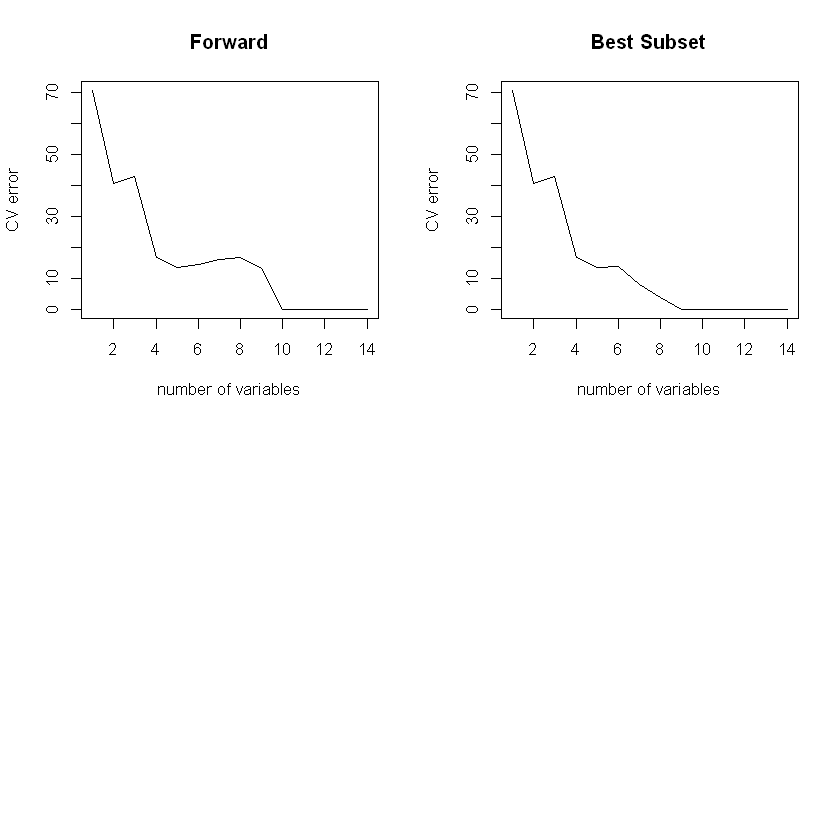

In [448]:
par(mfrow=c(2,2))
plot(c(1:14),cv_err_cereal_fwd, xlab ="number of variables", ylab= "CV error", main = "Forward",type="l")
plot(c(1:14),cv_err_cereal_exh,xlab ="number of variables", ylab= "CV error", main = "Best Subset",type="l")


In [432]:
print("cofficients included in the final model using the in-sample method, and it has a total of 9 variables: ")
coef_fwd_insample

print("cofficients included in the final model using the in-validation set method, and it has a total of 9 variables: ")
coef_fwd_valset

print("cofficients included in the final model using the in-sample method, and it has a total of 9 variables: ")
coef_exh_insample

print("cofficients included in the final model using the in-validation set method, and it has a total of 9 variables: ")
coef_exh_valset

[1] "cofficients included in the final model using the in-sample method, and it has a total of 9 variables: "


(Intercept)    calories     protein         fat      sodium       fiber 
54.92718420 -0.22272417  3.27317387 -1.69140800 -0.05449270  3.44347977 
      carbo      sugars      potass    vitamins 
 1.09245094 -0.72489514 -0.03399335 -0.05121197

[1] "cofficients included in the final model using the in-validation set method, and it has a total of 9 variables: "


(Intercept)      calories       protein           fat        sodium 
 5.492718e+01 -2.227242e-01  3.273174e+00 -1.691408e+00 -5.449270e-02 
        fiber         carbo        sugars        potass      vitamins 
 3.443480e+00  1.092451e+00 -7.248951e-01 -3.399335e-02 -5.121197e-02 
         cups 
 5.158980e-08

[1] "cofficients included in the final model using the in-sample method, and it has a total of 9 variables: "


(Intercept)    calories     protein         fat      sodium       fiber 
54.92718420 -0.22272417  3.27317387 -1.69140800 -0.05449270  3.44347977 
      carbo      sugars      potass    vitamins 
 1.09245094 -0.72489514 -0.03399335 -0.05121197

[1] "cofficients included in the final model using the in-validation set method, and it has a total of 9 variables: "


(Intercept)    calories     protein         fat      sodium       fiber 
54.92718402 -0.22272418  3.27317378 -1.69140784 -0.05449270  3.44347981 
      carbo      sugars      potass    vitamins 
 1.09245102 -0.72489508 -0.03399335 -0.05121197

- By looking at the MSE for all methods, we can see that the least square method has the highest MSE, this indicates that the baseline model included more than what necessary in predicting ratings. 
- Between in-sample method and validation set approach, I argue that the validation set approach since the in-sample method although spans a larger sample (entire dataset), it lack a new set of data to validate the model which validation set approach makes up for. 
- Between forward and best subset selection method using the validation set method, we can see that MSE for forward selection method is slightly lower than best subset selection method. Therefore, in this case we can go ahead and day that forward selection gave us an even better model! Since this dataset included only a very few variables, therefore we might not see a drastic difference in our final model using either method. However in practice, when we have a dataset with higher dimension, the forward subset selection can yield a way higher error than the best subset method. However, as the dimension increases, the best subset selection, it would be computationally expensive to perform since it is a 2^p model. Therefore we should resort to other methods such as forward or backward method, and generate a model with a low enough error that we can accept. 
- Also, a model with more coefficient can reduce our ability to interpret the model, even if it can increase the predictive accuracy, this is a decision that we the person has to make.
- In conclusion, since the cereal dataset only has 14 (excluding name) varaibles, it really doesn't matter which model we use, it provided us with the similar results. However, since best subset selection gave us a lower MSE value, and only included 9 variables (1 less than forward subset selection), and this is a small enough dataset (few variable) so we can easily compute best-subet. Therefore in this case, we will say that our best model is the 9 variable model generated using best subset selection. 


# Question 2

In [223]:
library(mclust)
library(robust)

Warning message:
"package 'robust' was built under R version 3.6.3"Loading required package: fit.models
Warning message:
"package 'fit.models' was built under R version 3.6.3"Registered S3 methods overwritten by 'robust':
  method              from      
  plot.covfm          fit.models
  print.covfm         fit.models
  summary.covfm       fit.models
  print.summary.covfm fit.models
rlm is already registered in the fit.models registry
covfm is already registered in the fit.models registry

Attaching package: 'robust'

The following objects are masked from 'package:fit.models':

    ddPlot.covfm, distancePlot.covfm, ellipsesPlot.covfm,
    screePlot.covfm



### Load dataset  & Define independent and dependent variables

In [1]:
load(file = "zip.train.RData")


#### Extractings 2's and 3's

In [2]:
twothr_idx = which((zip.train[,1]==2) | (zip.train[,1]==3))
zip_train_df = zip.train[twothr_idx,]
zip_train_df = data.frame(zip_train_df)

In [3]:
y_train_zip = zip_train_df[,1]
X_train_zip = zip_train_df[,-1]

In [210]:
load(file = "zip.test.RData")

In [211]:
twothr_idx_test = which((zip.test[,1]==2) | (zip.test[,1]==3))
zip_test_df= zip.test[twothr_idx_test,]
zip_test_df = data.frame(zip_test_df)

In [271]:
y_test_zip = zip_test_df[,1]
X_test_zip = zip_test_df[,-1]


In [511]:
dim(zip_train_df)
dim(zip_test_df)

[1] 1389  257

[1] 364 257

### Least Squares Method

In [213]:
lm_mod_zip <- lm(formula = zip_train_df[,1] ~ . ,data=X_train_zip)

In [214]:
y_pred_zip <- predict(lm_mod_zip,X_test_zip)

#### Thresholding the prediction values by 2.5
- rounding up to 3 if the value is larger than 2.5, rounding down to 2 otherwise

In [216]:
for (i in 1:length(y_pred_zip)){
    if (y_pred_zip[i] >= 2.5){
        y_pred_zip[i] <- 3
    } else{
        y_pred_zip[i] <- 2
    }
}

#### Calculate MSE

In [502]:
MSE_zip_lm =  mse(y_test_zip,y_pred_zip)
MSE_zip_lm

[1] 0.04120879

#### Testing accuracy

In [501]:
test_acc_zip_lm = accuracy(y_pred_zip,y_test_zip)
test_acc_zip_lm

[1] 0.9587912

#### Confusion Matrix

In [273]:
cm_zip_lm = table(y_test_zip,y_pred_zip)
cm_zip_lm

          y_pred_zip
y_test_zip   2   3
         2 191   7
         3   8 158

### KNN

In [458]:
# install.packages("class")
library(class)
install.packages('rlist')
library(rlist)

Installing package into 'C:/Users/qlian/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependency 'XML'



package 'XML' successfully unpacked and MD5 sums checked
package 'rlist' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\qlian\AppData\Local\Temp\Rtmp6ryqLA\downloaded_packages


Warning message:
"package 'rlist' was built under R version 3.6.3"

#### Presetting the "neighbor" parameter
- we are doing 1 - 31 odd number of neighbors, to avoid even number of neighbors (to avoid a "tie" in decision within in neighbors). Also, a wide enough range we can potentially see an effect of overfitting and underfitting by using different number of neighbors
- Although, in the question, we are only asked to perform with odd numbers in range 1 to 15, however I ran this from 1:31, in order to get a greater grasp of how accuracy and mse changes as k changes

In [475]:
neighbors = c(seq(1,31,2))

In [485]:
mse_train_knn <- rep(NA,length(neighbors)) 
mse_test_knn <- rep(NA,length(neighbors))  
training_acc_knn <- rep(NA,length(neighbors)) 
testing_acc_knn <- rep(NA,length(neighbors)) 

for(i in 1:length(neighbors)){
    #prediction 
    knn_pred_train <- knn(train=X_train_zip,test=X_train_zip,cl=y_train_zip,k=neighbors[i])
    knn_pred_test <- knn(train=X_train_zip,test=X_test_zip,cl=y_train_zip,k=neighbors[i])
    
    #training and testing accuracy
    training_acc <- accuracy(knn_pred_train,y_train_zip)
    testing_acc <- accuracy(knn_pred_test,y_test_zip)
    
    #training and testing MSE
    mse_val_train <- mse(y_train_zip,as.numeric(as.character(knn_pred_train)))
    mse_val_test <- mse(y_test_zip,as.numeric(as.character(knn_pred_test)))
    
    #store mse and accuracy values
    mse_train_knn[i] <- mse_val_train
    mse_test_knn[i] <- mse_val_test
    training_acc_knn[i] <- training_acc
    testing_acc_knn[i] <- testing_acc
    
    cat("training accuracy with k =",neighbors[i],"is:",training_acc,"and the class error is:",mse_val_train,"\n")
    cat("testing accuracy with k =",neighbors[i],"is:",testing_acc,"and the class error is:",mse_val_test,"\n\n")
}


training accuracy with k = 1 is: 1 and the class error is: 0 
testing accuracy with k = 1 is: 0.9752747 and the class error is: 0.02472527 

training accuracy with k = 3 is: 0.9949604 and the class error is: 0.005039597 
testing accuracy with k = 3 is: 0.9697802 and the class error is: 0.03021978 

training accuracy with k = 5 is: 0.9942405 and the class error is: 0.005759539 
testing accuracy with k = 5 is: 0.9697802 and the class error is: 0.03021978 

training accuracy with k = 7 is: 0.9935205 and the class error is: 0.006479482 
testing accuracy with k = 7 is: 0.967033 and the class error is: 0.03296703 

training accuracy with k = 9 is: 0.9906407 and the class error is: 0.009359251 
testing accuracy with k = 9 is: 0.9642857 and the class error is: 0.03571429 

training accuracy with k = 11 is: 0.9913607 and the class error is: 0.008639309 
testing accuracy with k = 11 is: 0.9642857 and the class error is: 0.03571429 

training accuracy with k = 13 is: 0.9913607 and the class error

#### Plotting MSE and accuracy values for training and testing
- we will plot MSE and accuracy values for train and test set with respsect to k

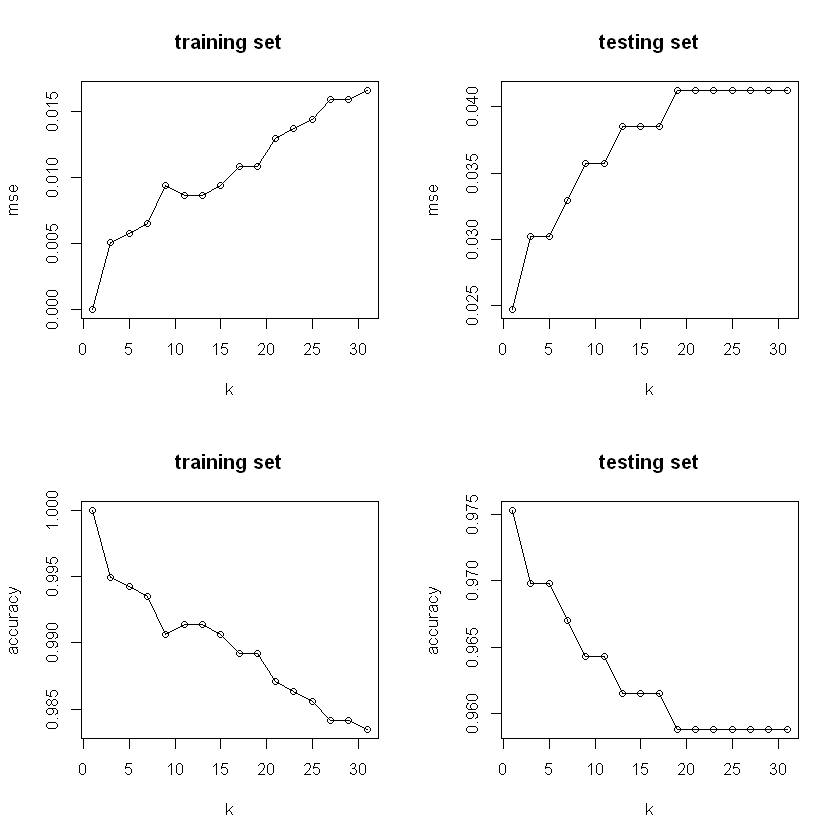

In [498]:
par(mfrow=c(2,2))
plot(neighbors,mse_train_knn,xlab="k",ylab="mse",main="training set",type="o")
plot(neighbors,mse_test_knn,xlab="k",ylab="mse",main="testing set",type="o")
plot(neighbors,training_acc_knn,xlab="k",ylab="accuracy",main="training set",type="o")
plot(neighbors,testing_acc_knn,xlab="k",ylab="accuracy",main="testing set",type="o")


- Overall, as k gets bigger, the error rate should increase since we are going from a situation where we are overfitting with a really small k value to a larger k value that could lead to underfitting if it is too big. 
- we can see that training MSE steadily increasses as k increases, however in testing set the increase in MSE is more rapid. If we look at it more closely, we see a stair case effect, for example, with k= 3,5 and k the MSE stayed the same. Same thing can be observed for other pairs of k values. Until it gets to 17 and beyong, we can see that MSE saturates at same value, little over 0.41. We can contribute this to the size of testing set, since it is a lot smaller than the training set, it is less sensitive to the choice of k value. Performing KNN with k=3 or k=5 are essentially the same.
- Accuracy is similar to MSE, but instead of increasing, it decreases as k gets bigger, it folows the same trend as MSE for both training and testing

In [510]:
cbind(neighbors,mse_train_knn,mse_test_knn,training_acc_knn,testing_acc_knn)

neighbors,mse_train_knn,mse_test_knn,training_acc_knn,testing_acc_knn
1,0.000000000,0.02472527,1.0000000,0.9752747
3,0.005039597,0.03021978,0.9949604,0.9697802
5,0.005759539,0.03021978,0.9942405,0.9697802
7,0.006479482,0.03296703,0.9935205,0.9670330
9,0.009359251,0.03571429,0.9906407,0.9642857
11,0.008639309,0.03571429,0.9913607,0.9642857
13,0.008639309,0.03846154,0.9913607,0.9615385
15,0.009359251,0.03846154,0.9906407,0.9615385
17,0.010799136,0.03846154,0.9892009,0.9615385
19,0.010799136,0.04120879,0.9892009,0.9587912


In [507]:
cbind(MSE_zip_lm,test_acc_zip_lm)

MSE_zip_lm,test_acc_zip_lm
0.04120879,0.9587912


In [ ]:
dim

- By comparing testing accuracy and testing MSE we can see that:
    - MSE obtained from the linear model is ~0.04120879, notice that this value is the same ass any MSE for KNN with k larger or equal to 19. We can see that MSE does not decrease tremendously as k decreases. This can be attributed to a small test set with a high dimension -> (364 257). However in general, we should see a more drastic change in MSE as k values change. 
    - In this case, the linear model performed really well in terms of model predictability. It produced a small MSE value that's comparable to knn algorithm when K=19 or larger. With smaller k value in KNN algorithm with smaller MSE for example, MSE =~ 0.033 when k = 7

# Question 3

## Part (a)

### Load the dataset

In [281]:
# install.packages("ISLR")
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 3.6.3"

In [2]:
dim(College)

[1] 777  18

In [3]:
str(College)

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

#### Convert "Private" to numeric 

In [282]:
College$Private <- as.numeric(College$Private)-1

#### Check for missing values

In [283]:
colSums(is.na(College))

Private        Apps      Accept      Enroll   Top10perc   Top25perc 
          0           0           0           0           0           0 
F.Undergrad P.Undergrad    Outstate  Room.Board       Books    Personal 
          0           0           0           0           0           0 
        PhD    Terminal   S.F.Ratio perc.alumni      Expend   Grad.Rate 
          0           0           0           0           0           0

- no missing values! Let's proceed

### Check distribution of the variables

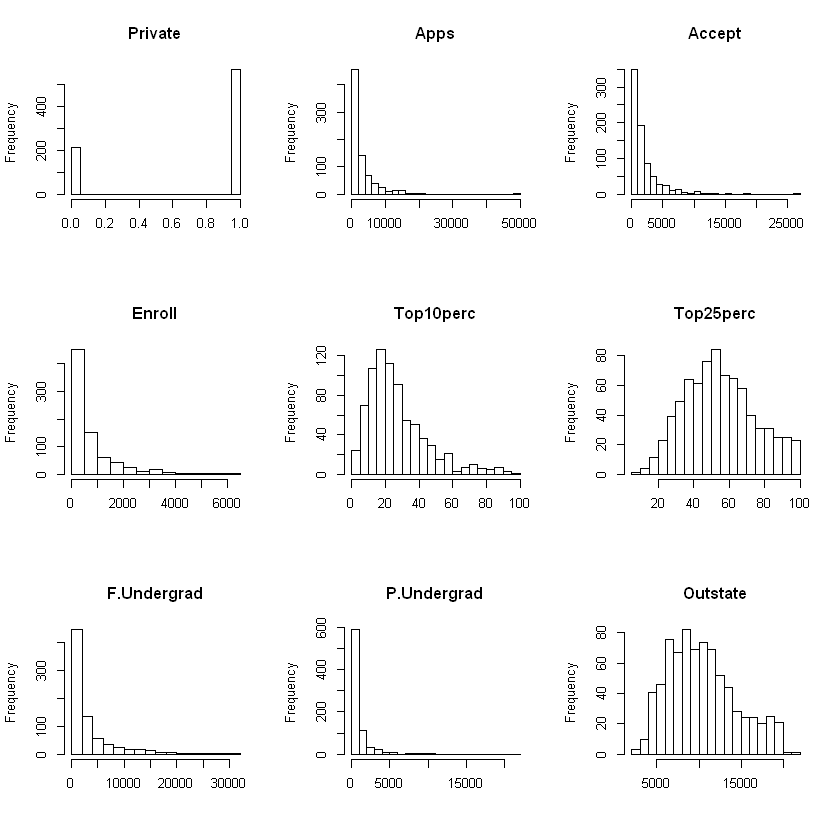

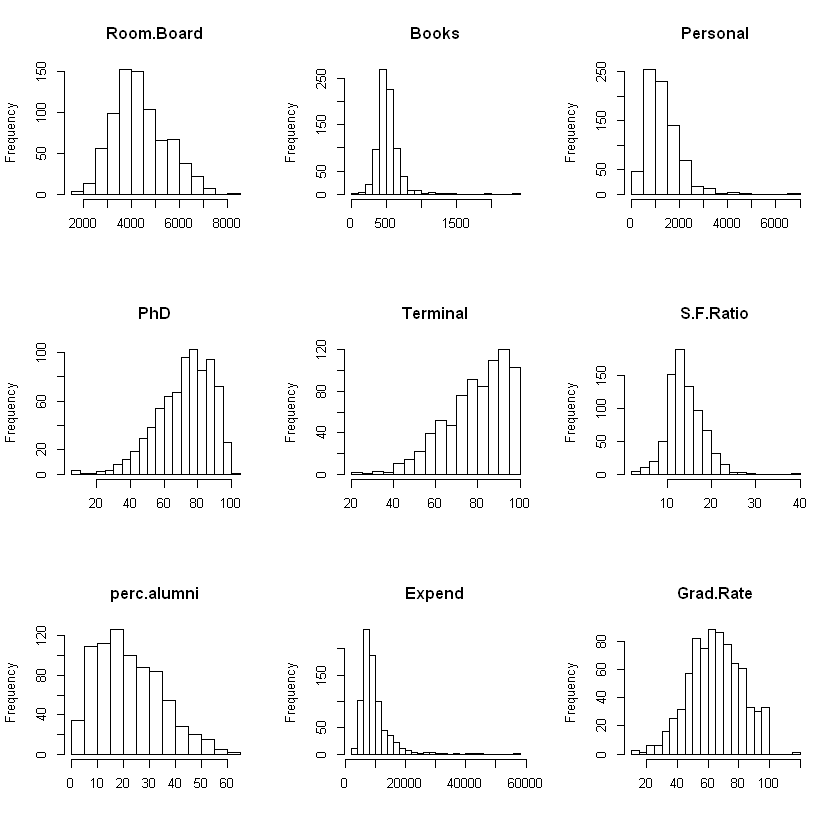

In [284]:
par(mfrow = c(3,3))

for (i in 1:length(College)) {
  hist(as.numeric(College[,i]),breaks = 20,main=names(College)[i],xlab=NULL)
}

- some features are heavily skewed, therefore we will be performing some transformation on some of these features in order to achieve or simulate "Gaussian distribution" since the models that we will be fitting have normality assumption
- also notice that the feature parameteres have very different scales, we will be performing feature standardization as well, after the train test split. Since the models we will be using will include some type of Euclidean distance calculation, scaling is important.

In [285]:
names(College)

[1] "Private"     "Apps"        "Accept"      "Enroll"      "Top10perc"  
 [6] "Top25perc"   "F.Undergrad" "P.Undergrad" "Outstate"    "Room.Board" 
[11] "Books"       "Personal"    "PhD"         "Terminal"    "S.F.Ratio"  
[16] "perc.alumni" "Expend"      "Grad.Rate"

### Feature Engineering
- we can see that "Apps", "Accept", "Enroll", "Top10perc","F.Undergrad", "P.Undergrad", "Personal", "S.F.Ratio" and "Expend", are postively skewed, and  "PhD", "Terminal" are negatively skewed
- we will perform transformation on these variables


In [512]:
#postively skewed variables transformed using log(var+C), where c is a constant (5 in this case)
log_Apps = log(College$Apps+5)
log_Accept = log(College$Accept+5)
log_Enroll = log(College$Enroll+5)
log_Top10perc = log(College$Top10perc+5)
log_F.Undergrad = log(College$F.Undergrad+5)
log_P.Undergrad = log(College$F.Undergrad+5)
log_Books = log(College$Books+5)
log_Personal = log(College$Personal+5)
log_S.F.Ratio = log(College$S.F.Ratio+5)
log_Expend = log(College$Expend+5)

#negatively skewed variables transformed using log((max(var)-var)+C), where c is a constant (5 in this case)

log_PhD = log((max(College$PhD)-(College$PhD))+5)
log_Terminal = log((max(College$Terminal)-(College$Terminal))+5)



#### Replacing the original variables with the variables we just transformed 

In [287]:
temp <- College[,-c(2,3,4,5,7,8,9,11,12,13,14,17)]

In [288]:
College_transformed <- as.data.frame(cbind(temp,
                               log_Apps,
                               log_Accept,
                               log_Enroll,
                               log_Top10perc,
                               log_F.Undergrad,
                               log_P.Undergrad,
                               log_Books,
                               log_Personal,
                               log_S.F.Ratio,
                               log_Expend,
                               log_PhD,
                               log_Terminal))

In [289]:
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,1,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


#### Now, let's take a look at the distribution of all the variables again

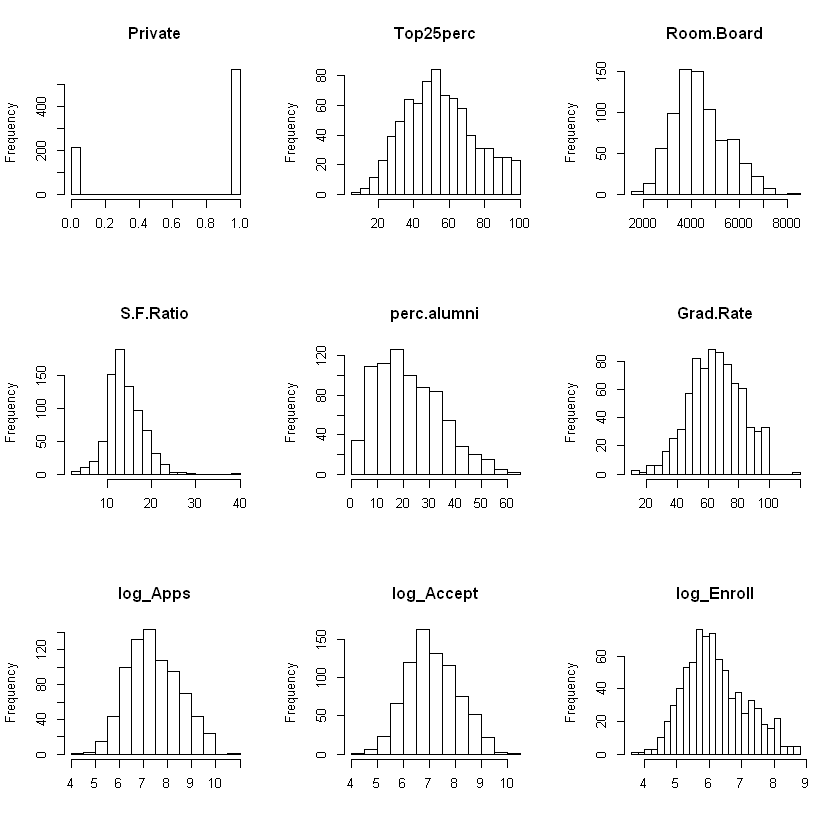

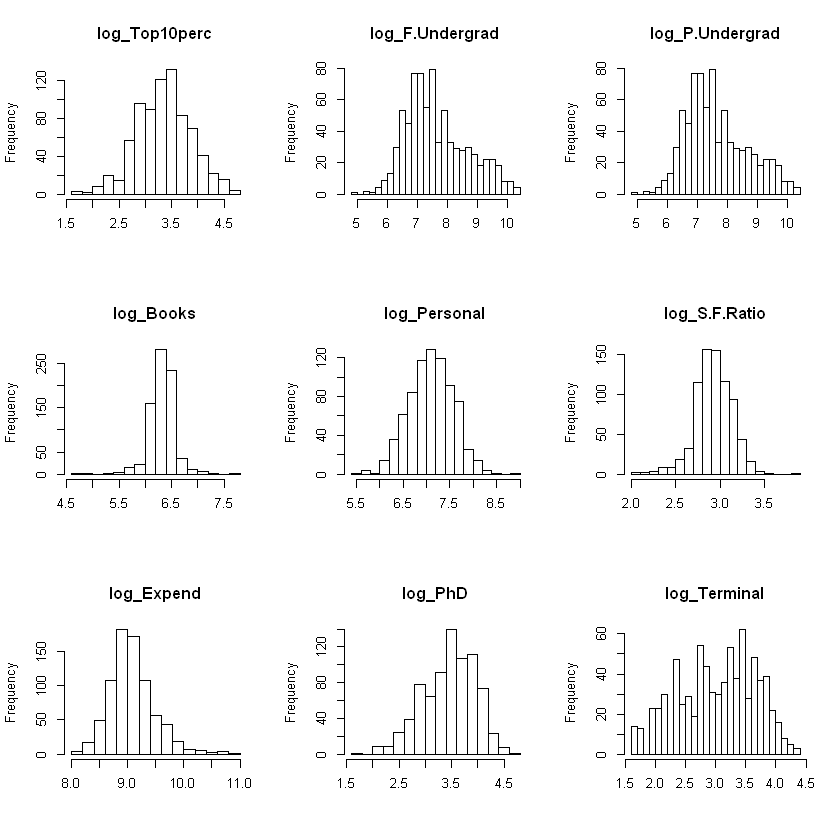

In [290]:
par(mfrow=c(3,3))
for (i in 1:length(College_transformed)){
    hist(College_transformed[,i],breaks=20,xlab=NULL,main = names(College_transformed)[i])
}

- almost all variables are close to normal distribution, let's proceed

In [291]:
College_df <- College_transformed

### Define independent and dependent variables

In [292]:
X <- model.matrix(College_df$log_Apps~.,College_df)[,-7]
y <- College_df$log_Apps

## Train test split

In [329]:
set.seed(20)

In [330]:
indx = sample(1:length(College_df[,1]), 2/3*length(College_df[,1]))
College_train_df = College_df[indx,]
College_test_df = College_df[-indx,]


### Scaling feature parameters

In [331]:
College_train_df <- as.data.frame(scale(College_train_df))

In [332]:
College_test_df <- as.data.frame(scale(College_test_df))

### Define Independent and dependent variables

In [335]:
idx = grep("log_Apps", colnames(College_train_df))
y_train_college <- College_train_df[,idx]
X_train_college <- College_train_df[,-idx]
y_test_college <- College_test_df[,idx]
X_test_college <- College_test_df[,-idx]


In [ ]:
X_mat_train_college <- model.matrix(College_train_df$log_Apps~.,X_train_college)[,-idx]
X_mat_test_college <- model.matrix(College_test_df$log_Apps~.,X_test_college)[,-idx]

## Least Squares Method Regression

In [336]:
lm_mod_college <- lm(formula = College_train_df$log_Apps~.,data = College_train_df)

In [337]:
y_pred_college = predict(lm_mod_college,X_test_college)

Warning message in predict.lm(lm_mod_college, X_test_college):
"prediction from a rank-deficient fit may be misleading"

#### Calculate MSE

In [531]:
MSE_lm = mse(y_test_college, y_pred_college)
cat("MSE for least-square method model: ", MSE_lm)

MSE for least-square method model:  0.03581371

## Ridge

In [304]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Loaded glmnet 4.0-2


In [315]:
lambda_range = 10^seq(10,-2,length=100) 

In [341]:
ridge_mod = glmnet(X_mat_train_college,y_train_college,alpha=0,lambda=lambda_range,standardization=FALSE)

#### Let's plot our coefficent values against lambda 

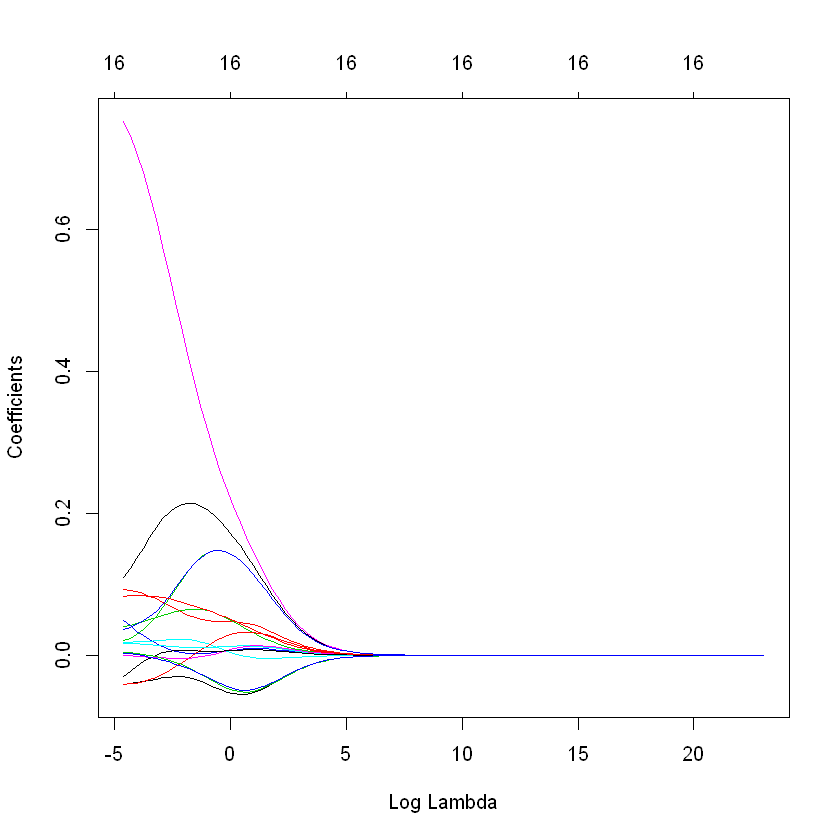

In [514]:
plot(ridge_mod,xvar="lambda")


- we can see that at log lambda  ~6, all the variable parameters are almost close to 0

### Lambda value selection using Cross-Validation method

[1] 0.09735062

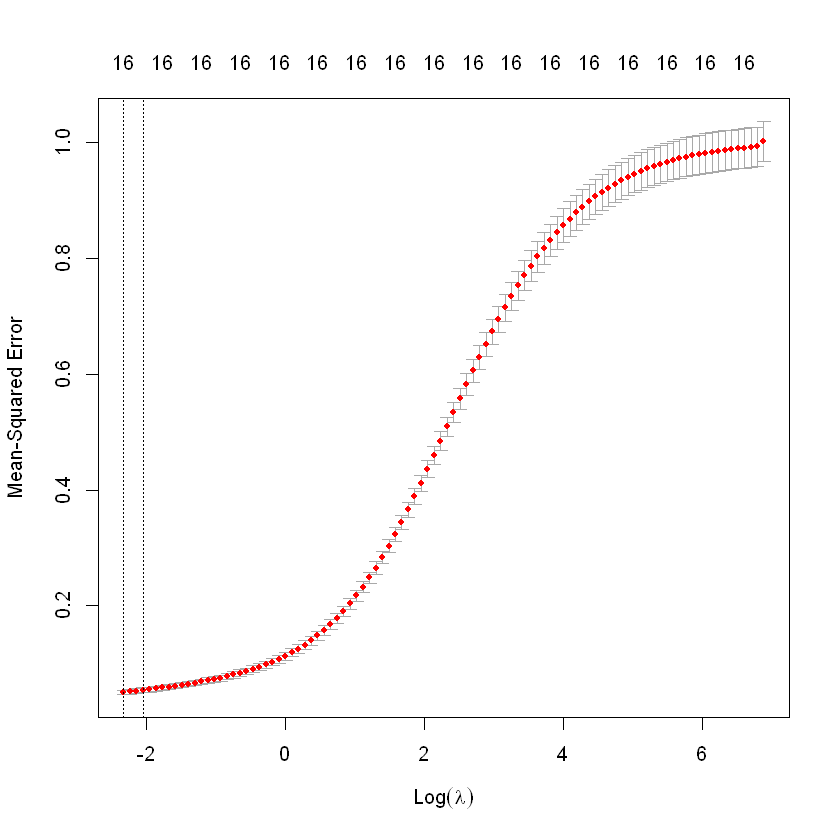

In [359]:
set.seed(20)
cv_err_ridge = cv.glmnet(X_mat_train_college,y_train_college,alpha=0,standardization=FALSE)
plot(cv_err_ridge)
bestlam_ridge = cv_err_ridge$lambda.min
bestlam_ridge

In [515]:
y_pred_ridge = predict(ridge_mod,s=bestlam_ridge,newx=X_mat_test_college)

#### Calculate MSE

In [517]:
MSE_ridge = mse(y_test_college,y_pred_ridge)
cat("MSE for Ridge method model: ", MSE_ridge)

MSE for Ridge method model:  0.05209206

## Lasso

In [356]:
lasso_mod <- glmnet(X_mat_train_college,y_train_college,alpha=1,lambda=lambda_range,standardization=FALSE)

#### Let's plot our coefficent values against lambda 

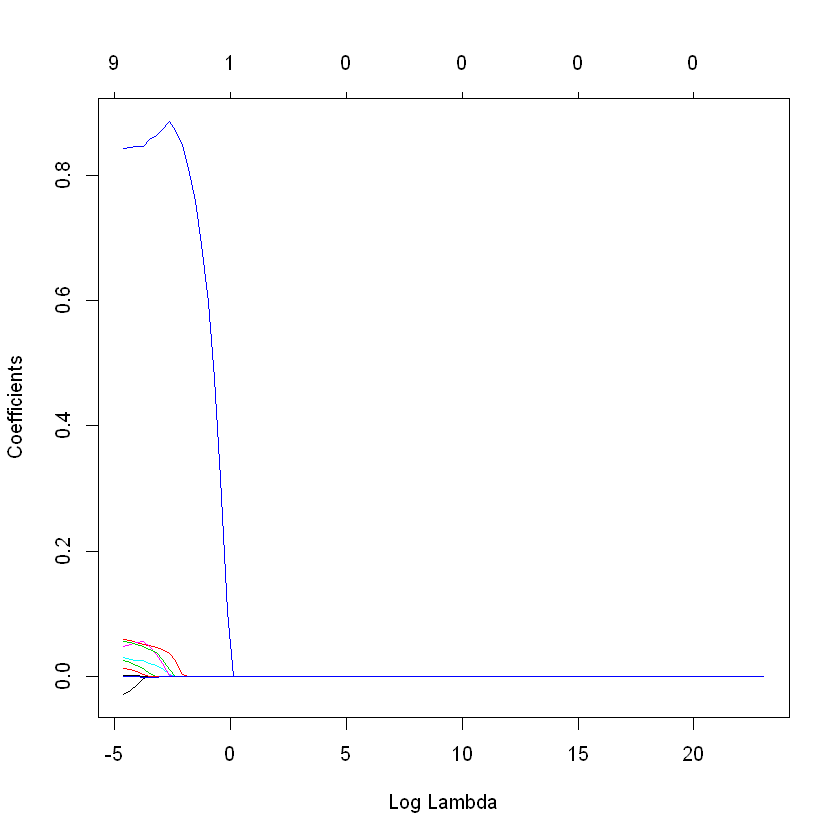

In [518]:
plot(lasso_mod,xvar="lambda")


- we can see from this figure that, lasso set most variables to 0 at around ~log(lambda=-2.5) 

[1] 0.001911032

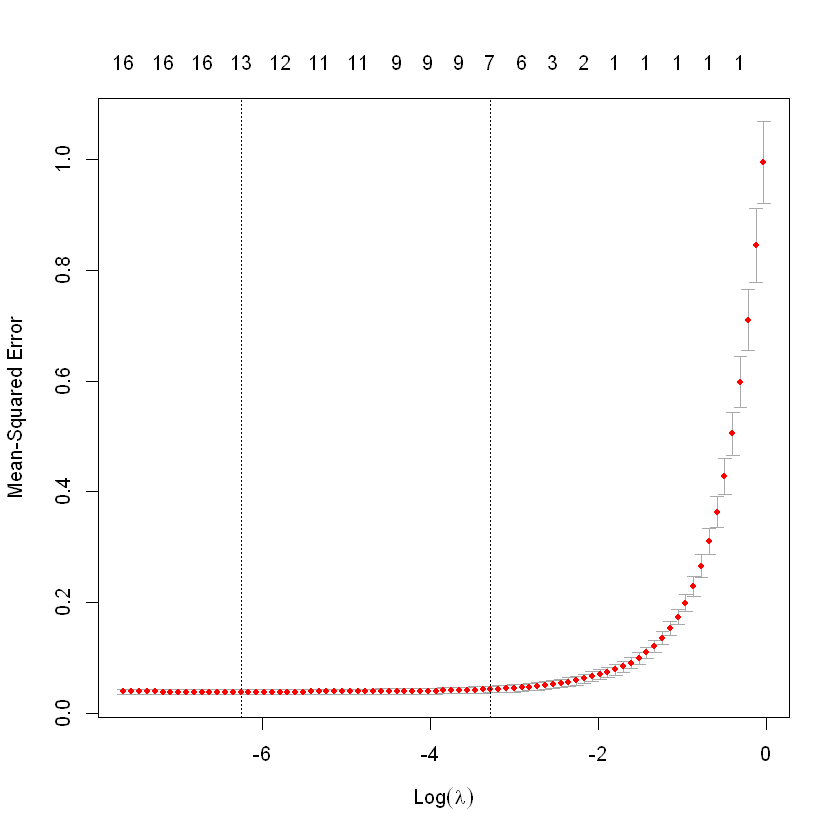

In [519]:
set.seed(20)
cv_err_lasso = cv.glmnet(X_mat_train_college,y_train_college,alpha=1,standardization=FALSE)
plot(cv_err_lasso)
bestlam_lasso = cv_err_lasso$lambda.min
bestlam_lasso

In [520]:
y_pred_lasso = predict(lasso_mod,s=bestlam_lasso,newx=X_mat_test_college)


[1] 0.03568362

#### Calculate MSE

In [521]:
MSE_lasso = mse(y_test_college,y_pred_lasso)
cat("MSE for Lasso method model: ", MSE_lasso)

MSE for Lasso method model:  0.03568362

#### View the the remaining variables in the final model, since lasso method performs "variable selection" by setting some variables to 0 with some lambda value

In [368]:
predict(lasso_mod,type="coefficients",s=bestlam_lasso)[1:18,]

(Intercept)     (Intercept)         Private       Top25perc      Room.Board 
  -4.239062e-16    0.000000e+00   -2.945077e-02    5.800842e-02    2.552217e-02 
      S.F.Ratio     perc.alumni      log_Accept      log_Enroll   log_Top10perc 
   0.000000e+00    0.000000e+00    8.432954e-01    3.005450e-02    0.000000e+00 
log_F.Undergrad log_P.Undergrad       log_Books    log_Personal   log_S.F.Ratio 
   4.781102e-02    7.081588e-04    1.257904e-02    0.000000e+00    0.000000e+00 
     log_Expend         log_PhD    log_Terminal 
   5.597689e-02    0.000000e+00    0.000000e+00

- we can see that we now have 9 variables in the final model (not including intercept), instead of 17 variables in the dataset

## Principle Component Regression

In [369]:
# install.packages("pls")
library(pls)

Warning message:
"package 'pls' was built under R version 3.6.3"
Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



In [370]:
set.seed(30)

In [1]:
pcr_mod = pcrcomp(log_Apps~.,data=College_train_df,scale=FALSE,validation="CV")

ERROR: Error in pcrcomp(log_Apps ~ ., data = College_train_df, scale = FALSE, : could not find function "pcrcomp"


#### Let's plot a validation plot

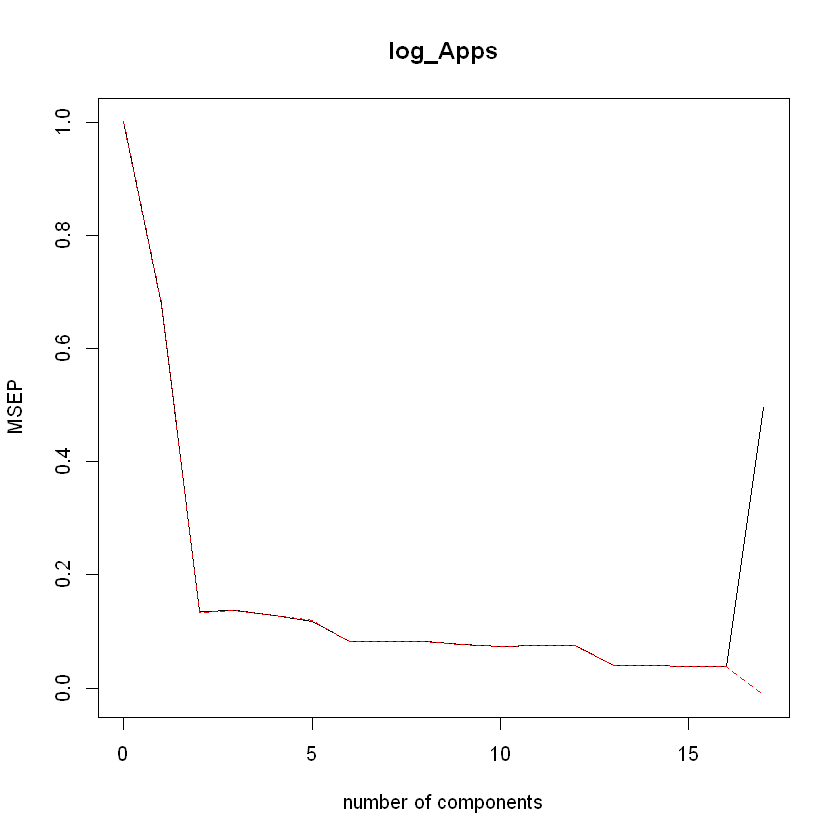

In [372]:
validationplot(pcr_mod,val.type="MSEP")

- visually, we can see that 156components has the lowest msep, however, we can see that the MSEP values really did not change that much from 6~15 components roughtly

In [373]:
summary(pcr_mod)

Data: 	X dimension: 518 17 
	Y dimension: 518 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.


Warning message in sqrt(z$val):
"NaNs produced"

       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           1.001   0.8240   0.3669   0.3699   0.3575   0.3428   0.2874
adjCV        1.001   0.8243   0.3667   0.3698   0.3585   0.3445   0.2866
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      0.2873   0.2865   0.2780    0.2724    0.2739    0.2739    0.2017
adjCV   0.2868   0.2861   0.2777    0.2720    0.2735    0.2736    0.2010
       14 comps  15 comps  16 comps  17 comps
CV       0.2017    0.1964    0.1950    0.7037
adjCV    0.2014    0.1960    0.1946       NaN

TRAINING: % variance explained
          1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X           32.15    62.09    69.97    75.81    80.96    85.84    89.54
log_Apps    34.62    86.71    86.71    87.96    89.16    92.13    92.15
          8 comps  9 comps  10 comps  11 comps  12 comps  13 comps  14 comps
X           92.76    95.17     96.90     97.93     98.80     99.34     99.75
log_Apps    92.21    9

-we can look at the CV error for number of components, it seems like from 12 components to 13 components there is a drastic decrease in MSEP values, and did not change too much after that until 17 components. Therefore we will be using 13 components in our model  even though 15 gave use the minimum MSEP, but 13 would do the justice.

In [527]:
y_pred_pcr = predict(pcr_mod,X_mat_test_college,ncomp=13)

#### Calculate MSE

In [529]:
MSE_pcr = mse(y_test_college,y_pred_pcr)
cat("MSE for PCR method model: ", MSE_pcr)

MSE for PCR method model:  0.07456351

## Partial Least Square

In [377]:
set.seed(30)

In [378]:
pls_mod = plsr(log_Apps~.,data=College_train_df,scale=FALSE,validation="CV")

#### Let's plot a validation plot

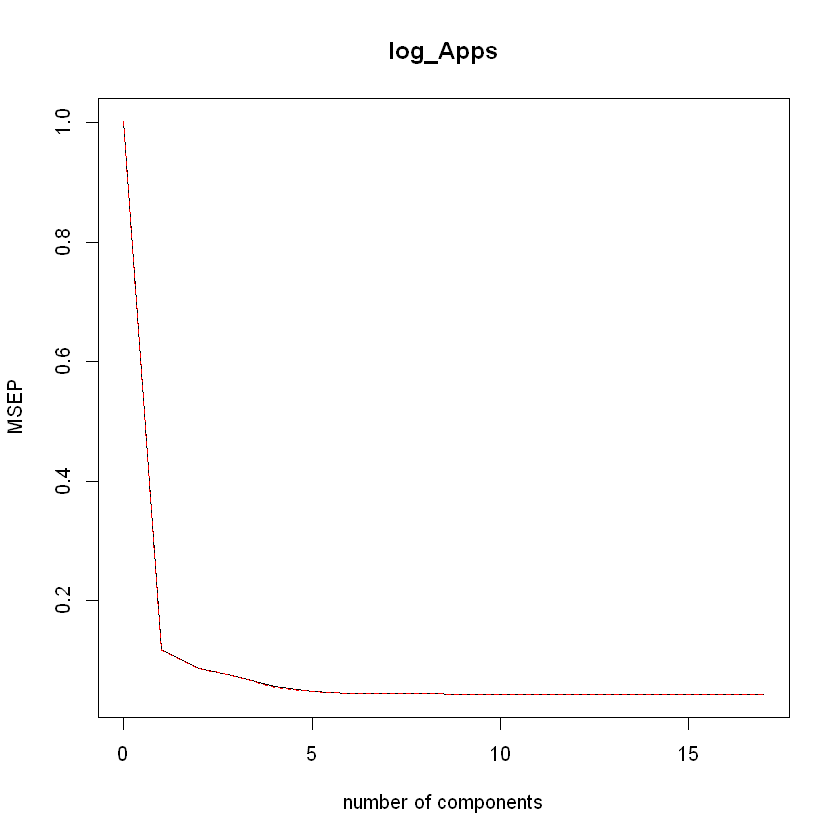

In [234]:
validationplot(pls_mod,val.type="MSEP")

- we can see from the graph above that there is a big jump in MSEP, however MSEP kind of saturates after ~5 components

In [233]:
summary(pls_mod)

Data: 	X dimension: 518 17 
	Y dimension: 518 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           1.001   0.3429   0.2949   0.2691   0.2369   0.2208   0.2115
adjCV        1.001   0.3423   0.2953   0.2691   0.2354   0.2192   0.2102
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      0.2103   0.2102   0.2087    0.2079    0.2073    0.2070    0.2074
adjCV   0.2094   0.2094   0.2081    0.2074    0.2069    0.2066    0.2069
       14 comps  15 comps  16 comps  17 comps
CV       0.2072    0.2070    0.2070    0.2070
adjCV    0.2068    0.2065    0.2066    0.2066

TRAINING: % variance explained
          1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X           31.08    47.12    67.60    69.87    73.25    75.78    78.55
log_Apps    88.55    91.60    93.08    94.89    95.57    95.87    95.92
         

- by looking at the summary table. we see that 4 components model seems to yield a low CV error, from 3 components to 4 components there is a somewhat significant decrease in MSEP values. However after 4 components, MSEP does not have drastic changes. We will include 4 components in our final model for PLS

In [381]:
y_pred_pls = predict(pls_mod,X_mat_test_college,ncomp=4)

#### Calculate MSE

In [530]:
MSE_pls = mse(y_test_college,y_pred_pls)
cat("MSE for PLS method model: ", MSE_pls)


MSE for PLS method model:  0.05698753

## Compare all 5 methods: 
- Least squares (baseline)
- Ridge
- Lasso
- Principle Component Regression
- Partial Least Square

In [532]:
cbind(MSE_lm,MSE_ridge,MSE_lasso,MSE_pcr,MSE_pls)

MSE_lm,MSE_ridge,MSE_lasso,MSE_pcr,MSE_pls
0.03581371,0.05209206,0.03568362,0.07456351,0.05698753


- the table above displays all the MSE values from the 5 technique above, the model with "best" parameters, such as lambda values for ridge and lasso, number of components for PCR and PLS are chosen to generate the final model. I am using least square method model as a baseline to compare with other models. The "best" parameter are sometimes determines by the algorithm where parameters that produces the minimum error is taken. However for PCR, and PLS, I personally chose number of components that gives us the best trade-off not necessarily the smallest error. Of course my choice could biased and different from others. However, if we look at the table above, we can see that there is not a huge different among these MSE values with highest being the MSE from PCR and lowest being the MSE from least square method (which is our baseline method). This could be due to many faactors, one of them is that in a model with a small observation and small dimensions, sometimes we do not need complex methods to perform feature selection or feature engineering. In this case, the linear model can do the job perfectly fine, and predict the applications received well. However in a dataset with high p, these method would come in handy and are expected to perform substantially better. 